# Introduction

We are given some data of the total power and tv power consumption of three different houses for one day. 

# Task 1

## Objective:

Using the TV power consumption data, we should identify the times where the TV is on. 


# Import Modules

In this section, we import the required modules for our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In this section, we read the file of our data.

In [4]:
data = pd.read_csv('Q3-data.csv')

Let's check the first five rows of our dataframe.

In [5]:
data.head()

,House,Time,TV,Agg
0,1.0,0.0,11.463,26.205
1,1.0,1.0,11.702,25.771
2,1.0,2.0,11.016,24.963
3,1.0,3.0,11.054,96.582
4,1.0,4.0,11.123,100.034


We find some basic information about our dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   House   4320 non-null   float64
 1   Time    4320 non-null   float64
 2   TV      4320 non-null   float64
 3   Agg     4320 non-null   float64
dtypes: float64(4)
memory usage: 135.1 KB


From the above output we see that we have 4320 instances (rows) and 4 columns.

We also check for any missing values.

In [7]:
data.isnull().sum()

House    0
Time     0
TV       0
Agg      0
dtype: int64

As we can see from the above output, we do not have any missing values.

# Data Visualization

Here, we present some figures of the TV consumption, in order to get some insight of our data.

We firstly, make a scatter plot of the TV consumption versus the time for each house separately.

In [8]:
data_house1 = data[data['House']==1.0]#create dataframe with the data of the first house
data_house2 = data[data['House']==2.0]#create dataframe with the data of the second house
data_house3 = data[data['House']==3.0]#create dataframe with the data of the third house

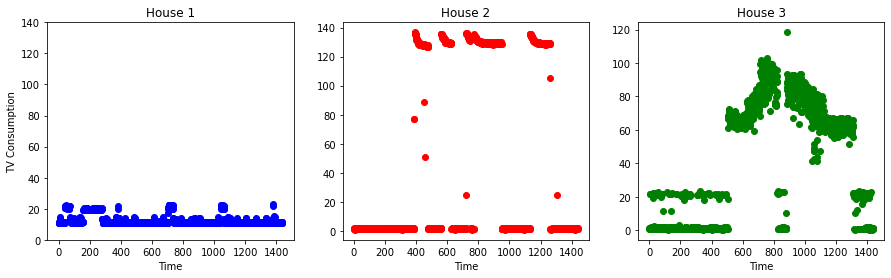

In [10]:
plt.figure(figsize=(15,4)) #make a bigger figure
plt.subplot(1,3,1) #create subplots in one rwo and three columns. This is the fist subplot.
plt.scatter(x=data_house1['Time'],y=data_house1['TV'],c='b') #plot TV consumption vs time for house 1.
plt.ylim(0,140) #change the limits of y-axis, making it similar with the other two following plots, in order to have a clearer picture.
#set axes labels and titles of subplot 1.
plt.xlabel('Time')
plt.ylabel('TV Consumption') #we use the same labels for the y-axis of all three subplots.
plt.title('House 1')

plt.subplot(1,3,2) #This is the second subplot.
plt.scatter(x=data_house2['Time'],y=data_house2['TV'],c='r') #plot TV consumption vs time for house 2.
#set x-axis label and titles of subplot 2.
plt.xlabel('Time')
plt.title('House 2')

plt.subplot(1,3,3) #This is the third subplot.
plt.scatter(x=data_house3['Time'],y=data_house3['TV'],c='g') #plot TV consumption vs time for house 3.
#set x-axis label and titles of subplot 3.
plt.xlabel('Time')
plt.title('House 3');

From the above figures, we can draw some conclusions about the TV consumption of each house. 

Let's start from house 3 (far right figure). Here, we notice that our points are mainly distributed around three different regions. The first region is around zero TV consumption, indicating that the TV is off. The second region is around the value of 20 TV consumption, probably showing that the TV is in standby mode and the last region is 60-120, which denotes that the TV is on.

For the second house, figure in the middle, we see that all the points are focused in only two different regions. The first one is around zero, showing that the TV is off, while the second one is around 120-140 indicating that the TV is on. 

Lastly, for the first house, figure in the far left side, it seems that all the points are concetrated only in one region where the TV consumption is around 20, showing that this TV was all day in standby mode. 

# Clustering

We saw from the above figure that we can easily categorize our data points in the available different categories (TV is off, TV is in standby mode and TV is on). However, there are some fluctuations in the TV consumption that makes this categorization a bit difficult for some particular points. For this reason, we are going to create a clustering model, in order to more strictly allocate all points to the corresponding category. More particularly, we are going to use the KMeans clustering algorithm.

From the above analysis, we realize that we should use a different number of clusters for each house. For the fisrt house we have already noticed that all the points belong to the same group and due to the range of values of the points we identify that the TV in house 1 was in standby mode all day. Hence, we do not need any clustering algorithm for house 1. For the second house we should have two clusters (n_clusters=2, TV is off which is around zero or TV is on which is around 120). Finally, for the third house we should have three clusters (n_clusters=3, TV is off which is around zero, or TV is in standby mode which is around 20 or TV is on which is around 80). We are going to determine the initial position of the centroids of the clusters using the values we just mentioned here.  

In [11]:
from sklearn.cluster import KMeans

In [13]:
#create KMeans clustering model, using two clusters for house 2. 
#We set the initial points of the centroids to be 0 and 120.
kmeans_house2 = KMeans(n_clusters=2,init=np.array([[0],[120]]))
#the features we are going to fit the KMeans model should be in a 2D array format, this is what we are doing in the following line.
X_house2 = np.array(data_house2['TV']).reshape(-1,1) 
kmeans_house2.fit(X_house2) #fit the model with the features
clusters_house2 = kmeans_house2.predict(X_house2) #make predictions. Namely we categorise each point into the two clusters.

#we follow the similar process for the third house. The only difference is that here we have 3 different clusters.
#We use 0, 20 and 80 as the starting points of their centroids.
kmeans_house3 = KMeans(n_clusters=3,init=np.array([[0],[20],[80]]))
X_house3 = np.array(data_house3['TV']).reshape(-1,1)
kmeans_house3.fit(X_house3)
clusters_house3 = kmeans_house3.predict(X_house3);

C:\Users\mkritsota\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\mkritsota\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


We make the same scatter plot as earlier, but now we categorize our data points into the different clusters. We show that by using different colors for each different cluster.

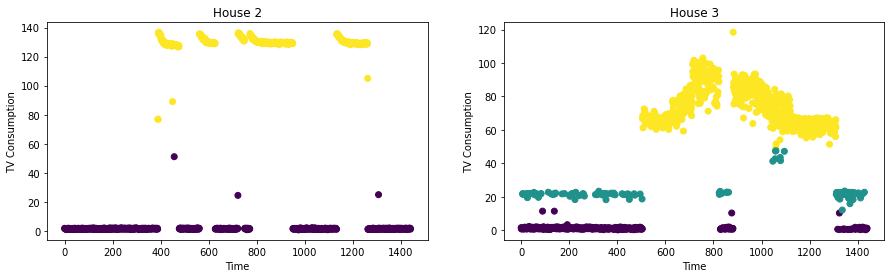

In [15]:
#the code here is identical with the code we used in the previous scatter plot. However, here we present 
#only the plots for the second and third house, as the plot for the first house has no particular interence, since there
#is only one cluster. The only difference is that here we colored our data points based on the cluster they belong,
#e.g. we used c=clusters_house2 for the second house and c=clusters_house3 for the third house
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(x=data_house2['Time'],y=data_house2['TV'],c=clusters_house2)
plt.xlabel('Time')
plt.ylabel('TV Consumption')
plt.title('House 2')

plt.subplot(1,2,2)
plt.scatter(x=data_house3['Time'],y=data_house3['TV'],c=clusters_house3)
plt.xlabel('Time')
plt.ylabel('TV Consumption')
plt.title('House 3');

So, now we are going to create a new column at each house dataframe, which would denote the target class ('On', 'Off', 'Standby') depending on the cluster that each point belongs.

In [16]:
#assign the result of our cluster model to the new column of the dataframe of the corresponding house.
data_house2.loc[:,'Target Classes'] = clusters_house2[:] 
data_house3.loc[:,'Target Classes'] = clusters_house3[:]

data_house1.loc[:,'Target Classes'] = 'Standby' # for house 1 we only have one class, which is the Standby mode.
data_house2.loc[:,'Target Classes'] = data_house2.loc[:,'Target Classes'].map({0:'Off',1:'On'})#we map the 0s and 1s to Off and On respectively for house 2.
data_house3.loc[:,'Target Classes'] = data_house3.loc[:,'Target Classes'].map({0:'Off',1:'Standby',2:'On'});#we map the 0s and 1s and 2s to Off, Standby and On respectively for house 3.

C:\Users\mkritsota\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mkritsota\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\mkritsota\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

We concatanate the dataframes of each house into one.

In [17]:
data_new = pd.concat([data_house1,data_house2,data_house3],axis=0)

Now, we create a column that specifies the times that the TV was on, for each house. In that column, we assign the string 'No' to the cases where the TV was not on.

In [18]:
data_new['Times TV is On'] = data_new[data_new['Target Classes'] == 'On']['Time'] 
data_new['Times TV is On'] = data_new['Times TV is On'].map({np.nan:'No'})

We check the first five rows of the new dataframe we created after all this analysis.

In [19]:
data_new.head()

,House,Time,TV,Agg,Target Classes,Times TV is On
0,1.0,0.0,11.463,26.205,Standby,No
1,1.0,1.0,11.702,25.771,Standby,No
2,1.0,2.0,11.016,24.963,Standby,No
3,1.0,3.0,11.054,96.582,Standby,No
4,1.0,4.0,11.123,100.034,Standby,No


The column 'Times TV is On' has the values of the times that the TV was on. It also has the value 'No' for the instances that the TV was off or in Standby mode. Hence, the numerical values in this column answer the first task we had to accomplish.

# Task 2

## Objective:
We want to build a classifier that would be able to predict the times when the TV is on. 

First of all, we are going to create a new column in our dataset specifying if the TV is on or not, and we are going to map those cases to 1 and zero respectively. This columns would be our target variable.

In [20]:
data_new['TV is On'] = data_new['Target Classes'].map({'Standby':0, 'Off':0, 'On':1})

We check again the first five rows.

In [21]:
data_new.head()

,House,Time,TV,Agg,Target Classes,Times TV is On,TV is On
0,1.0,0.0,11.463,26.205,Standby,No,0
1,1.0,1.0,11.702,25.771,Standby,No,0
2,1.0,2.0,11.016,24.963,Standby,No,0
3,1.0,3.0,11.054,96.582,Standby,No,0
4,1.0,4.0,11.123,100.034,Standby,No,0


Now it is time to declare the feature and the target variables. We are going to use the 'House', 'Time' and 'Agg' columns as feature variables. We do not use the 'TV' column, since this column essentially provides the information whether the TV in On or not. Here we just want to build a model which predicts if the TV is On or not, using the information provided by all the other features. The target variable would be the 'TV is On' column, as mentioned earlier.

In [22]:
X = data_new.drop(['TV','Target Classes','Times TV is On','TV is On'],axis=1)#drop all columns we do not want them to be our features.
y = data_new['TV is On']

We split our dataset into training and testing, in order to be able at the end to evaluate the performance of our model using new data (i.e. data that the model has not been trained on). 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#the training set and the testing set have size 80% and 20% respectively of the original.
#we also specify the parameter random_state, in order to obtain the same results every time we run our code.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Random Forerst Classifier

We are going to use a random forest classifier. This is an extremely powerful method that can identify patterns in our data.
We create the model and fit it only using the training data.

In [25]:
from sklearn.ensemble import RandomForestClassifier

#Essentially the Random Forest Classifier is an Ensemble method, which takes into account the result of many decision trees.
#Here we use 100 different decision trees.
rfr_clf = RandomForestClassifier(n_estimators=100)
rfr_clf.fit(X_train,y_train)

RandomForestClassifier()

We make predictions of the training data using our model.

In [26]:
y_train_pred = rfr_clf.predict(X_train)

## Evaluation of our Model

In this section we use the confusion matrix and the classifiation report in order to evaluate the performance of our model.

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

We print the confusion matrix and the classification report.

In [28]:
print(confusion_matrix(y_train,y_train_pred))
print('\n')#leave an empty line
print(classification_report(y_train,y_train_pred))

[[2463    0]
 [   0  993]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00       993

    accuracy                           1.00      3456
   macro avg       1.00      1.00      1.00      3456
weighted avg       1.00      1.00      1.00      3456



The confusion matrix and the classification report show that we perfectly classified all our training data. 
However, that might be a sign that our model is overfitting the training data and that it is going to perform badly in the test data. In order to reassure if our model is overfitting the training we use the k-fold cross-validation (CV) technique, where we split the training data into k folds and we train our model in the k-1 folds, while we measure the performance of the model in the remaining fold. Hence, we measure the performance of the model using unseen data, that the model has not been trained on. We do that k times, so at the end we have k performance measures. We take the mean and the standard deviation of these measures. 

If the performance of our model is much worse using the k-fold cross validation technique compared to the performance using the training data, that means that we are overfitting. 

In [29]:
from sklearn.model_selection import cross_val_score

In the following we are going to find the accuracy, the precision and the recall of the k iterations of the CV technique.
We consider all these measures because, as can be seen in the following figure the two target classes (TV is on and TV in not on) are imbalanced.

We create a count plot of the target variable, in order to show that we deal with an imbalanced dataset.

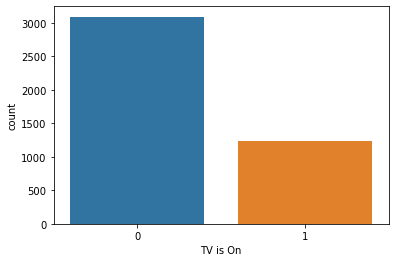

In [35]:
sns.countplot(x = data_new['TV is On']);

As aforementioned, here we use the k-fold CV method in order to train and evaluate our model. At the end we find the accuracy, precision and recall which are different measures evaluating the performance of our model.

In [31]:
#we use as estimator the random forest we created earlier. We use 10 folds, which is actually the default value.
#We change the scoring parameter, in order to find the accuracy, the precision and the recall. 
cv_accuracy_score = cross_val_score(estimator=rfr_clf,X=X_train,y=y_train,cv=10,scoring='accuracy')
cv_precision_score = cross_val_score(estimator=rfr_clf,X=X_train,y=y_train,cv=10,scoring='precision')
cv_recall_score = cross_val_score(estimator=rfr_clf,X=X_train,y=y_train,cv=10,scoring='recall')

Here we print the mean values and standard deviations of the accuracy, precision and recall that we obtained through the k-fold CV method.

In [32]:
print('The mean value of the accuracy using the k-fold CV method is {:.3f}, while the standard deviation is {:.3f}.'.format(cv_accuracy_score.mean(),cv_accuracy_score.std()))
print('The mean value of the precision using the k-fold CV method is {:.3f}, while the standard deviation is {:.3f}.'.format(cv_precision_score.mean(),cv_precision_score.std()))
print('The mean value of the recall using the k-fold CV method is {:.3f}, while the standard deviation is {:.3f}.'.format(cv_recall_score.mean(),cv_recall_score.std()))

The mean value of the accuracy using the k-fold CV method is 0.997, while the standard deviation is 0.002.
The mean value of the precision using the k-fold CV method is 0.995, while the standard deviation is 0.005.
The mean value of the recall using the k-fold CV method is 0.995, while the standard deviation is 0.007.


From the above evaluation we realise that indeed our model has a very good performance. Fist of all, it does not overfitting the training data, as well as its performance is not being affected by the imbalanced dataset with respect to the target classes, as shown from the almost perfect performance of the precision and recall.

Finally, we want to test the performance of our model using totally new instances. This is going to be the real performance of our model. We do that by finding the confusion matrix and classification report of the testing data.

In [33]:
y_test_pred = rfr_clf.predict(X_test)#find predictions of test data

Print the confusion matrix and classification report of our model for the predictions made on the test data.

In [34]:
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))

[[626   0]
 [  1 237]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       626
           1       1.00      1.00      1.00       238

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864



Again, we notice that our model almost perfectly classified all the test data. 

# Summary

In Task 1 we made some visualizations to get some insight on the data. We created a cluster model in order to categorize the data points. Using that model we were able to identify the case where the TV was on, off, or in standby mode.

In Task 2, having as a result the target variable from task 1, we built a Random Forest Classifier with perfect performance (accuracy=precision=recall=f1-score=1). We also used the k-fold cross validation method in order to check if our model is overfitting in the training data.Finally, we tested the performance of our classifier in new instances (test data) and we confirmed that we get almost perfect predictions (we only missed one data point. Hence, we got the same outstanding results for our measures accuracy=precision=recall=f1-score=1).